In [4]:
# !python tools/predict.py --config configs/segmenter/segmenter_rural2.yml --model_path ../output/segmenter_rural2/best_model/model.pdparams  --image_path ../photo/1167.png --save_dir ../output/test


### 🧪 项目简介：遥感图像多类分割（基于 PP-LiteSeg）

本项目基于 **PaddleSeg 提供的 PP-LiteSeg 模型**，用于遥感图像的语义分割任务。数据中包含多种地物标签，模型可输出多类别的像素级分割结果。PPLiteseg: Road Segment, Segmenter: multiple Segment

#### 📌 多分类标签说明：

| 类别编号 | 类别名称（英文） | 类别名称（中文） | 说明 |
|----------|------------------|------------------|------|
| 0        | background       | 背景              | 通常为未分类区域 |
| 1        | building         | 建筑              | 房屋、厂房等 |
| 2        | road             | 道路              | 包括主干道、辅路等 |
| 3        | water            | 水体              | 包括河流、湖泊等 |
| 4        | barren           | 裸土              | 裸露土地、沙地等 |
| 5        | forest           | 林地              | 森林、树木等 |
| 6        | agriculture      | 耕地              | 农田、种植区域 |


In [5]:
import pandas as pd
# 定义表格数据
df_label = {
    "类别编号": [0, 1, 2, 3, 4, 5, 6],
    "类别名称（英文）": ["background", "building", "road", "water", "barren", "forest", "agriculture"],
    "类别名称（中文）": ["背景", "建筑", "道路", "水体", "裸土", "林地", "耕地"],
    "说明": [
        "通常为未分类区域",
        "房屋、厂房等",
        "包括主干道、辅路等",
        "包括河流、湖泊等",
        "裸露土地、沙地等",
        "森林、树木等",
        "农田、种植区域"
    ]
}
df_label = pd.DataFrame(df_label)
df_label

,类别编号,类别名称（英文）,类别名称（中文）,说明
0,0,background,背景,通常为未分类区域
1,1,building,建筑,房屋、厂房等
2,2,road,道路,包括主干道、辅路等
3,3,water,水体,包括河流、湖泊等
4,4,barren,裸土,裸露土地、沙地等
5,5,forest,林地,森林、树木等
6,6,agriculture,耕地,农田、种植区域


In [ ]:
import os
import numpy as np
from PIL import Image
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pandas as pd
import seaborn as sns
from pylab import mpl, plt
from skimage import io

# best font and style settings for notebook 
warnings.filterwarnings('ignore')
sns.set_style("white")
mpl.rcParams['font.family'] = 'MiSans'


# 生成一个随机数据集（正态分布）

def predict_mask(image_path: str,
                 config_path: str = "configs/segmenter/segmenter_rural2.yml",
                 model_path: str = "../output/segmenter_rural2/best_model/model.pdparams",
                 save_dir: str = "../output/test") -> np.ndarray:
    """
    调用 PaddleSeg 的 predict.py 对输入图像进行分割预测，并返回对应的 mask np.ndarray。
    """
    # 调用 PaddleSeg 的命令行预测
    cmd = [
        "python", "tools/predict.py",
        "--config", config_path,
        "--model_path", model_path,
        "--image_path", image_path,
        "--save_dir", save_dir
    ]
    print(f"[🚀] 正在用 PP-LiteSeg 推理图像（仅道路）：{image_name}")
    subprocess.run(cmd, check=True)

    # 构造保存的 mask 路径
    image_name = os.path.splitext(os.path.basename(image_path))[0]
    mask_path = os.path.join(save_dir, "pseudo_color_prediction", f"{image_name}.png")

    # 读取 mask 图像
    if not os.path.exists(mask_path):
        print(f"[❌] 未找到输出文件：{mask_path}")
        raise FileNotFoundError(f"预测的mask文件未找到: {mask_path}")

    else:
        print(f"[✅] 成功读取输出文件：{mask_path}")
    mask_img = Image.open(mask_path)
    mask_np = np.array(mask_img)

    return mask_np


def road_seg(image_path: str) -> np.ndarray:
    """
    使用 PP-LiteSeg 模型对单张图像进行推理，返回预测后的 mask np.ndarray。
    
    参数:
        image_path (str): 输入图像路径

    返回:
        mask_np (np.ndarray): 推理后的分割图 numpy 数组（若失败则返回 None）
    """
    # 固定配置和路径
    config_path = "configs/road_seg/pp_liteseg_stdc1_deepglobe_infer.yml"
    model_path = "pp_liteseg_stdc1_deepglobe.pdparams"
    save_dir = "../output/test"
    pseudo_dir = os.path.join(save_dir, "pseudo_color_prediction")

    # 图像名（不带扩展名）
    image_name = os.path.splitext(os.path.basename(image_path))[0]
    print(f"[🚀] 正在用 Sengmenter 推理图像(多分类)：{image_name}")

    # 构建命令并执行
    cmd = [
        "python", "tools/predict.py",
        "--config", config_path,
        "--model_path", model_path,
        "--image_path", image_path,
        "--save_dir", save_dir
    ]
    subprocess.run(cmd, check=True)

    # 输出 mask 路径
    output_path = os.path.join(pseudo_dir, f"{image_name}.png")
    print(f"[🔍] 检查输出文件：{output_path}")

    if os.path.exists(output_path):
        print(f"[✅] 成功读取输出文件：{output_path}")
        mask_img = Image.open(output_path)
        mask_np = np.array(mask_img)
        return mask_np
    else:
        print(f"[❌] 未找到输出文件：{output_path}")
        return None


test_image = "../photo/11.png"
road_mask = road_seg(test_image)

[🚀] 正在用 PP-LiteSeg 推理图像：11
[🔍] 检查输出文件：../output/test\pseudo_color_prediction\11.png
[✅] 成功读取输出文件：../output/test\pseudo_color_prediction\11.png


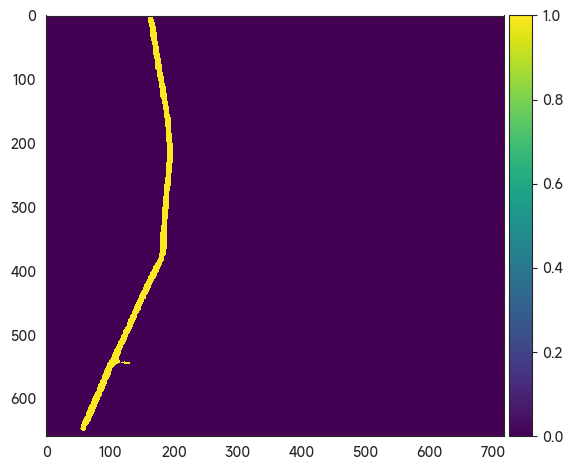

In [7]:
io.imshow(road_mask)

In [8]:

mask = predict_mask(test_image)

Mask shape: (659, 718)
[0 1 3 4 6]
(659, 718) (659, 718)


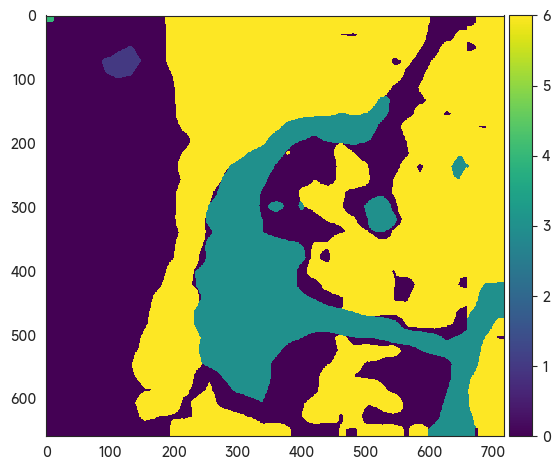

In [9]:
print("Mask shape:", mask.shape)
print(np.unique(mask))  # total 7 type
print(road_mask.shape,mask.shape)
io.imshow(mask)

In [10]:
mask[road_mask == 1] = 7# 2: road
mask

array([[4, 4, 4, ..., 6, 6, 6],
       [4, 4, 4, ..., 6, 6, 6],
       [4, 4, 4, ..., 6, 6, 6],
       ...,
       [0, 0, 0, ..., 6, 6, 6],
       [0, 0, 0, ..., 6, 6, 6],
       [0, 0, 0, ..., 6, 6, 6]], dtype=uint8)

In [11]:
np.unique(mask)

array([0, 1, 3, 4, 6, 7], dtype=uint8)

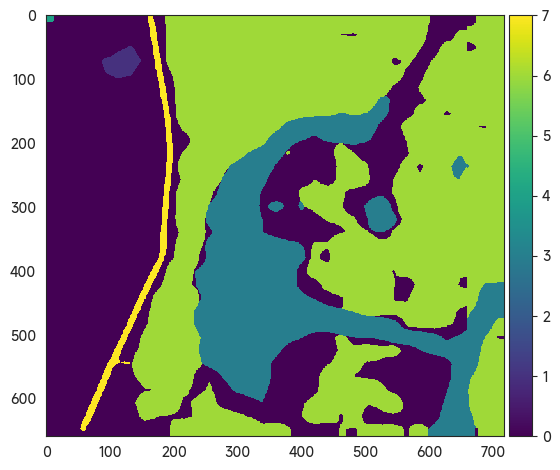

In [28]:
io.imshow(mask)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pandas as pd
import seaborn as sns
from pylab import mpl, plt

# best font and style settings for notebook 
warnings.filterwarnings('ignore')
sns.set_style("white")
mpl.rcParams['font.family'] = 'MiSans'
# 生成一个随机数据集（正态分布）

np.unique(mask)

array([3, 5], dtype=uint8)